<a href="https://colab.research.google.com/github/mehik01/ParticleProject1/blob/main/ParticleProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project One for Particle methods for Engineering Mechanics**

# Part 1
radius = r =0.1\
density (rho) =  ρ=2.5 g/cm3\
Elastic Modulus = E = 1MPa\
poissons ratio = v= 0.25\
Height above the ground = h = 1m

g = 9.8 m/s²


$\Delta t = 2 \left( \frac{m}{k} \right)^{1/2}$

Contact Stiffness = $k =  \frac{2.E}{{3(1-v^2)}} \cdot \sqrt{\frac{r_1 \cdot r_2}{{r_1 + r_2}}}$




$ \frac{r_1 \cdot r_2}{{r_1 + r_2}} $= 1 because it is infinite






# Calculating Δt

In [1]:
#importing  necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Contact Stiffness (k): 711111.1111111111 N/m
Δt: 2.4270323906946244e-05 seconds


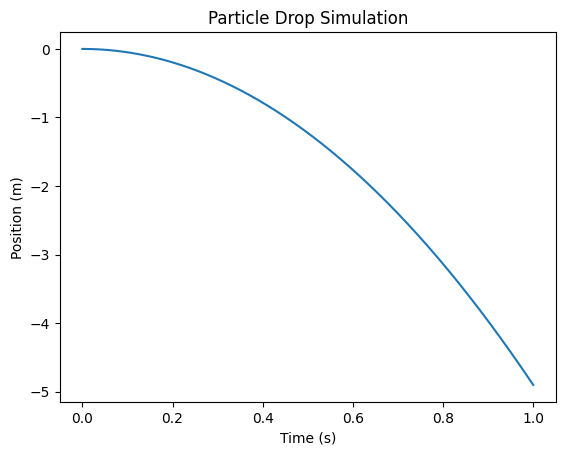

In [2]:

radius = 0.1  # meters
rho = 2.5  # g/cm^3
ElasticModulus = 1e6  # Pa (1 MPa)
PoissonsRatio = 0.25
height = 1.0  # meters
g = 9.8 # m/s2
# Conversion  from g/cm^3 to kg/m^3
density_kg_per_m3 = rho * 1e3

# Mass of the particle
volume = (4/3) * np.pi * radius**3
mass = rho * volume

# contact stiffness
k  = (2 * ElasticModulus) / (3 * (1 - PoissonsRatio**2))

# Calculate the time step
DeltaT =0.1*( 2 * np.sqrt(mass / k ))  # 0.1 to make it smaller

# Simulate the particle drop
time_steps = int(np.ceil(height / DeltaT))
position = np.zeros(time_steps)
velocity = np.zeros(time_steps)


for step in range(1, time_steps):
    # Update position and velocity using numerical integration (Euler method)
    acceleration = -g
    velocity[step] = velocity[step - 1] + acceleration * DeltaT
    position[step] = position[step - 1] + velocity[step] * DeltaT

print(f"Contact Stiffness (k): {k} N/m")

print(f"Δt: {DeltaT} seconds")

time = np.linspace(0, time_steps * DeltaT, time_steps)
plt.plot(time, position)
plt.title('Particle Drop Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

# Calculating Kinetic Energy and  Gravitational Potential Energy


The Gravitational potential energy (U) is calculated  by the formula:

 $ U=mgh $


The Kinetic  Energy (K) is calculated  by the formula:\
$K = \frac{1}{2} m v^2$\
where
m is the mass of the particle and
v is its velocity.

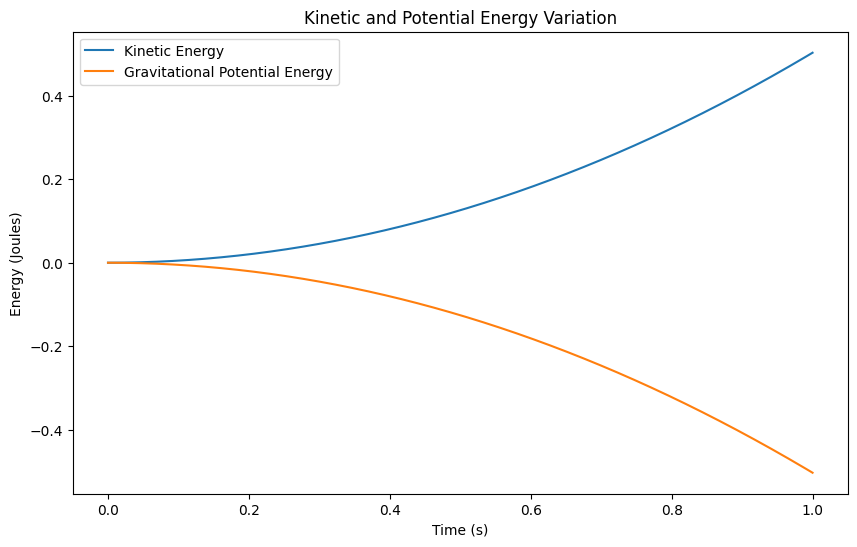

In [3]:
time_steps = int(np.ceil(height / DeltaT))
position = np.zeros(time_steps)
velocity = np.zeros(time_steps)
KineticEnergy = np.zeros(time_steps)
PotentialEnergy = np.zeros(time_steps)

for step in range(1, time_steps):
    acceleration = -g
    velocity[step] = velocity[step - 1] + acceleration * DeltaT
    position[step] = position[step - 1] + velocity[step] * DeltaT

    # Calculate kinetic energy (KE) and gravitational potential energy (PE)
    KineticEnergy[step] = 0.5 * mass * velocity[step]**2 # 1/2 = 0.5
    PotentialEnergy[step] = mass * g * position[step]


# Plotting
time = np.linspace(0, time_steps * DeltaT, time_steps)

plt.figure(figsize=(10, 6))

plt.plot(time, KineticEnergy, label='Kinetic Energy')
plt.plot(time, PotentialEnergy, label='Gravitational Potential Energy')

plt.title('Kinetic and Potential Energy Variation')
plt.xlabel('Time (s)')
plt.ylabel('Energy (Joules)')
plt.legend()
plt.show()

# Implementing Viscosity
